In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
data_path =  './data/house-prices-advanced-regression-techniques'

In [5]:
df = pd.read_csv(os.path.join(data_path, 'train.csv'))

In [6]:
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

random_seed = 40

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.001, random_state=random_seed)

In [8]:
# print column which contains nans:
columns_with_nulls = {}
for column_name, count in X_train.isna().sum(axis=0).items():
    if count > 0:
        print(f'{column_name}: {count} - {X_train[column_name].dtype}')
        columns_with_nulls[column_name] = count

LotFrontage: 258 - float64
Alley: 1367 - object
MasVnrType: 872 - object
MasVnrArea: 8 - float64
BsmtQual: 37 - object
BsmtCond: 37 - object
BsmtExposure: 38 - object
BsmtFinType1: 37 - object
BsmtFinType2: 38 - object
Electrical: 1 - object
FireplaceQu: 688 - object
GarageType: 81 - object
GarageYrBlt: 81 - float64
GarageFinish: 81 - object
GarageQual: 81 - object
GarageCond: 81 - object
PoolQC: 1451 - object
Fence: 1177 - object
MiscFeature: 1404 - object


In [9]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

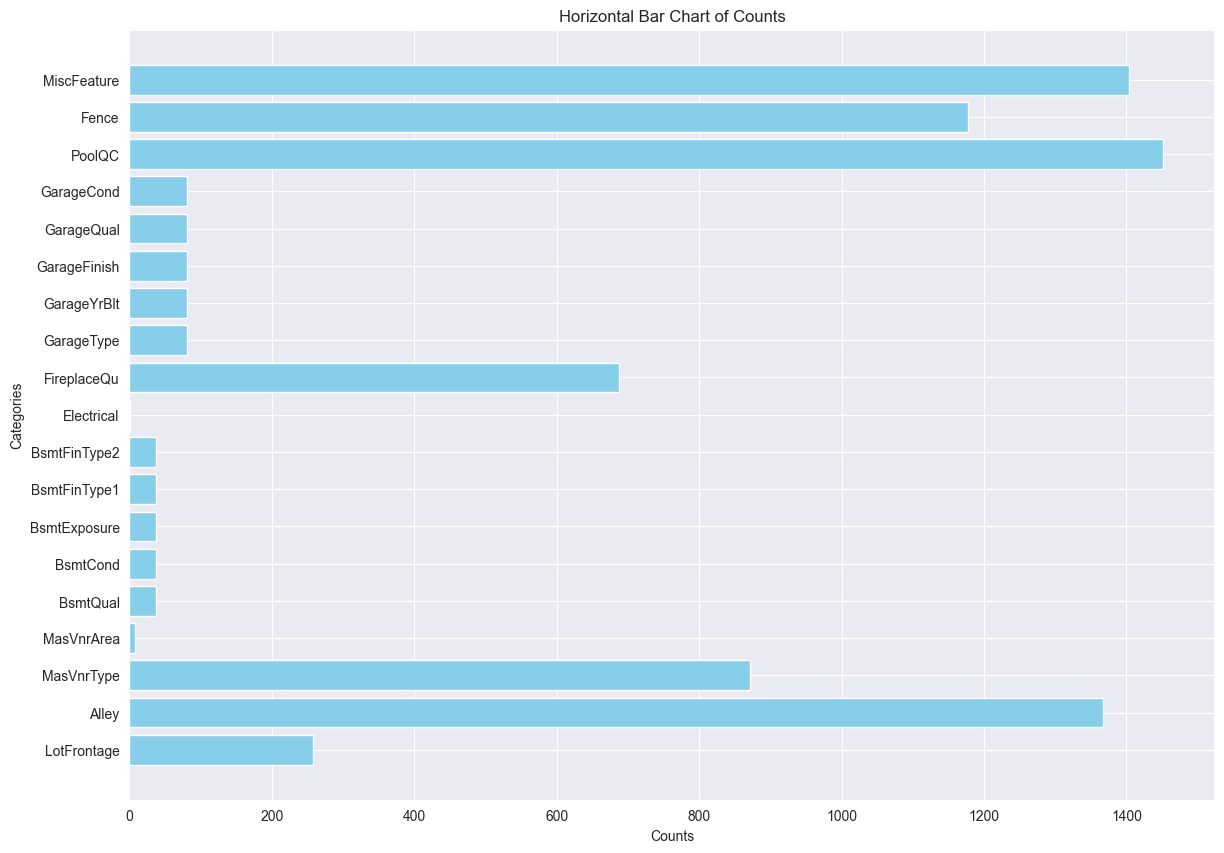

In [10]:
import matplotlib.pyplot as plt

data = columns_with_nulls
# Extract keys (categories) and values (counts)
categories = list(data.keys())
counts = list(data.values())

# Plot the horizontal bar chart
plt.figure(figsize=(14, 10))
plt.barh(categories, counts, color='skyblue')

# Labels and title
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart of Counts')

# Show the plot
plt.show()

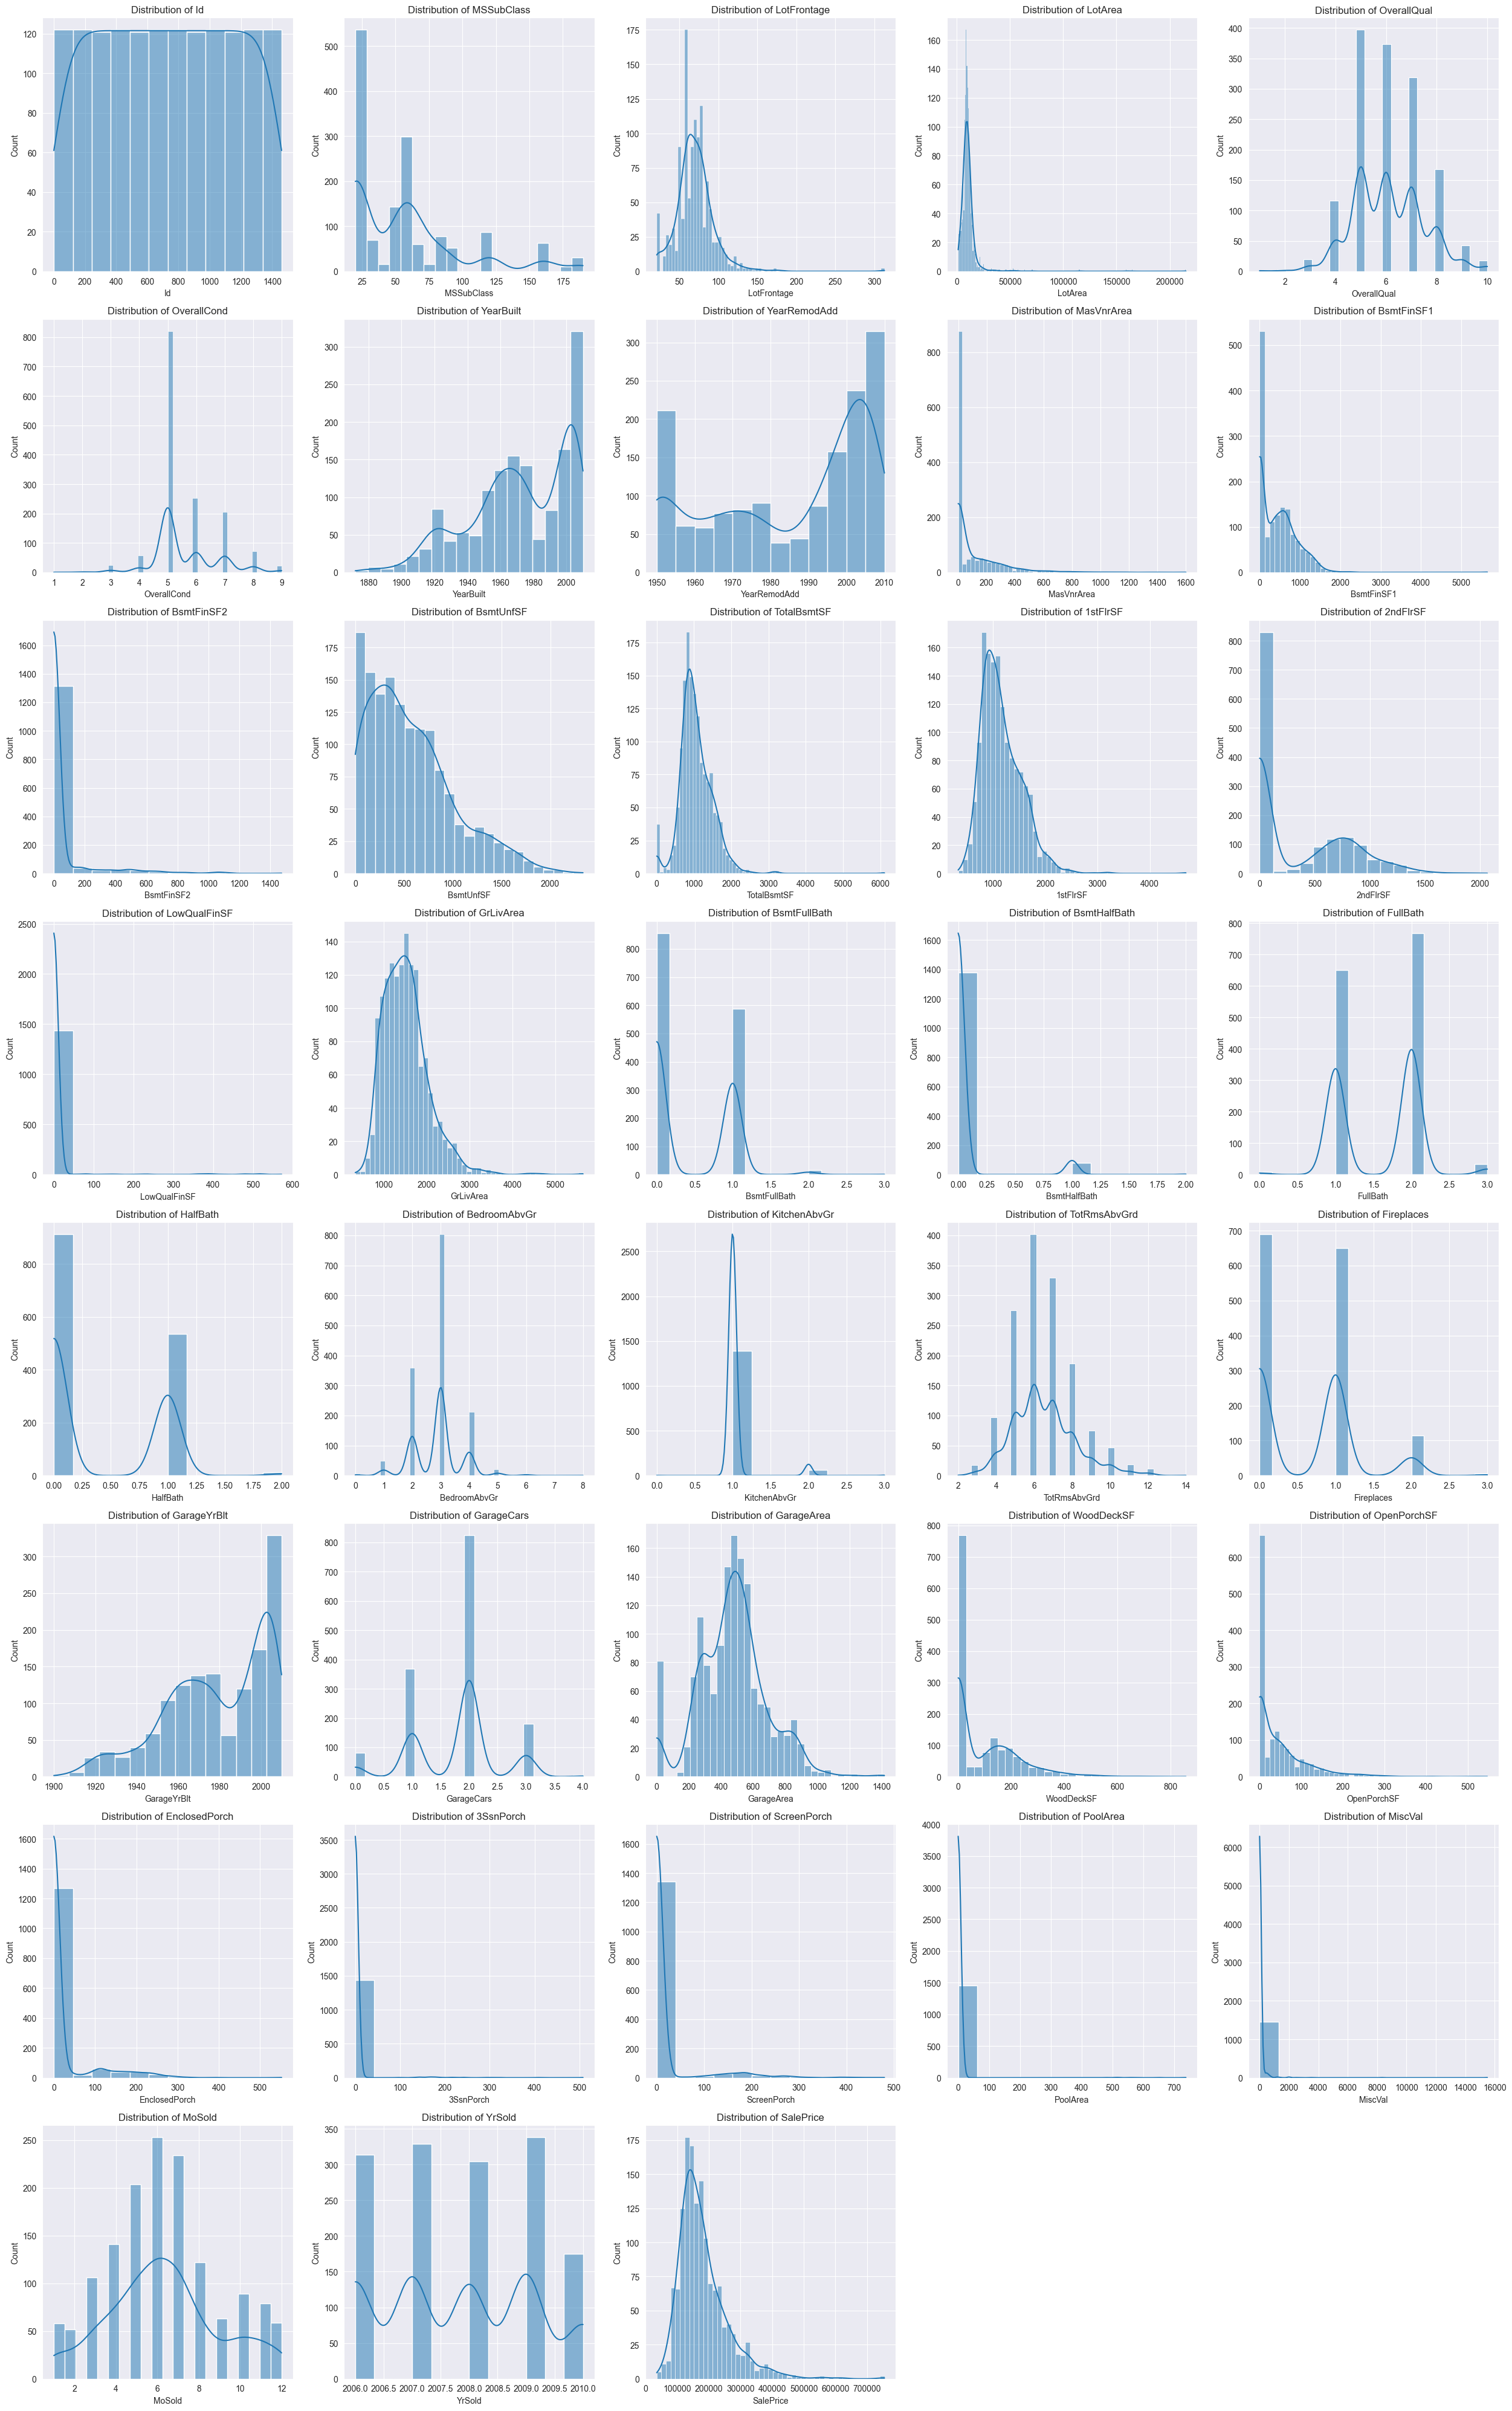

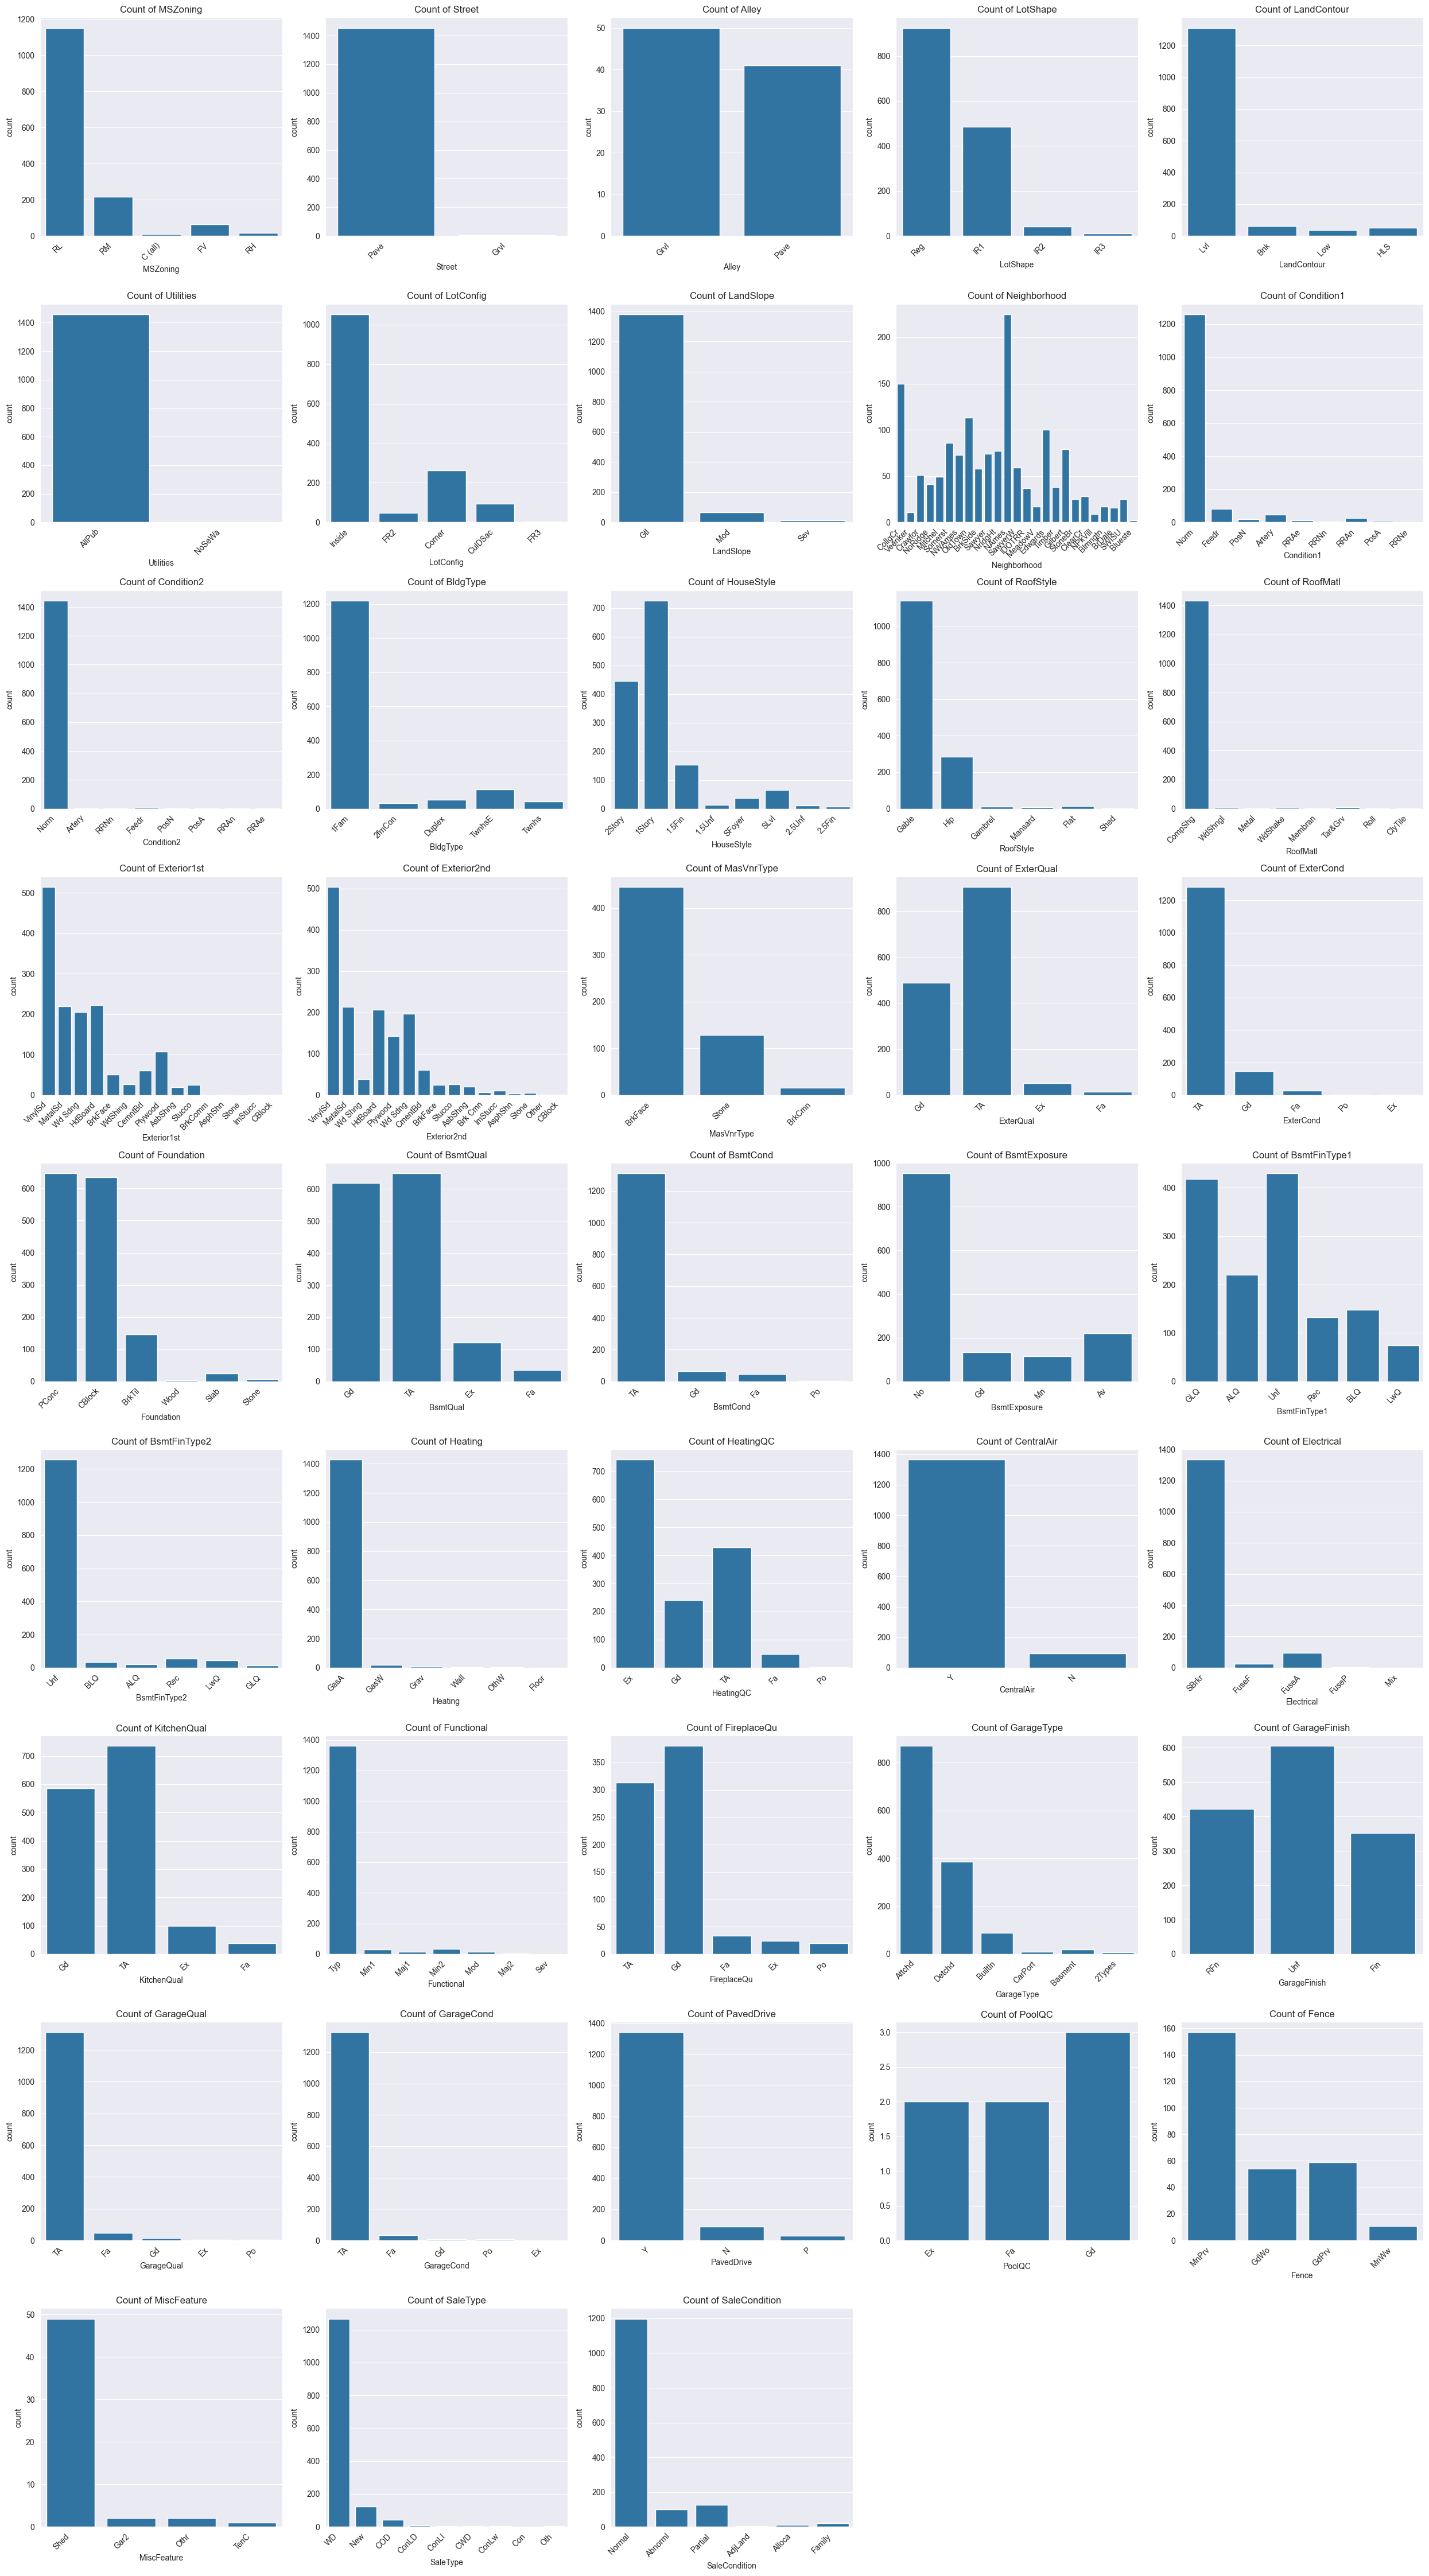

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataframe_distributions(df):
    """
    Plots the distributions of all columns in a pandas DataFrame, 
    separating categorical and numerical columns.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
    """
    df = df.replace([np.inf, -np.inf], np.nan) #added line to replace inf with nan.

    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    cols_per_row = 5
    # Plot numerical columns
    if len(numerical_cols) > 0:
        num_plots = len(numerical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(numerical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.histplot(df[col], kde=True) #using histplot instead of distplot, distplot is deprecated
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

    # Plot categorical columns
    if len(categorical_cols) > 0:
        num_plots = len(categorical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.countplot(x=df[col])
            plt.title(f'Count of {col}')
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
        plt.tight_layout()
        plt.show()


# Plot the distributions

plot_dataframe_distributions(df)


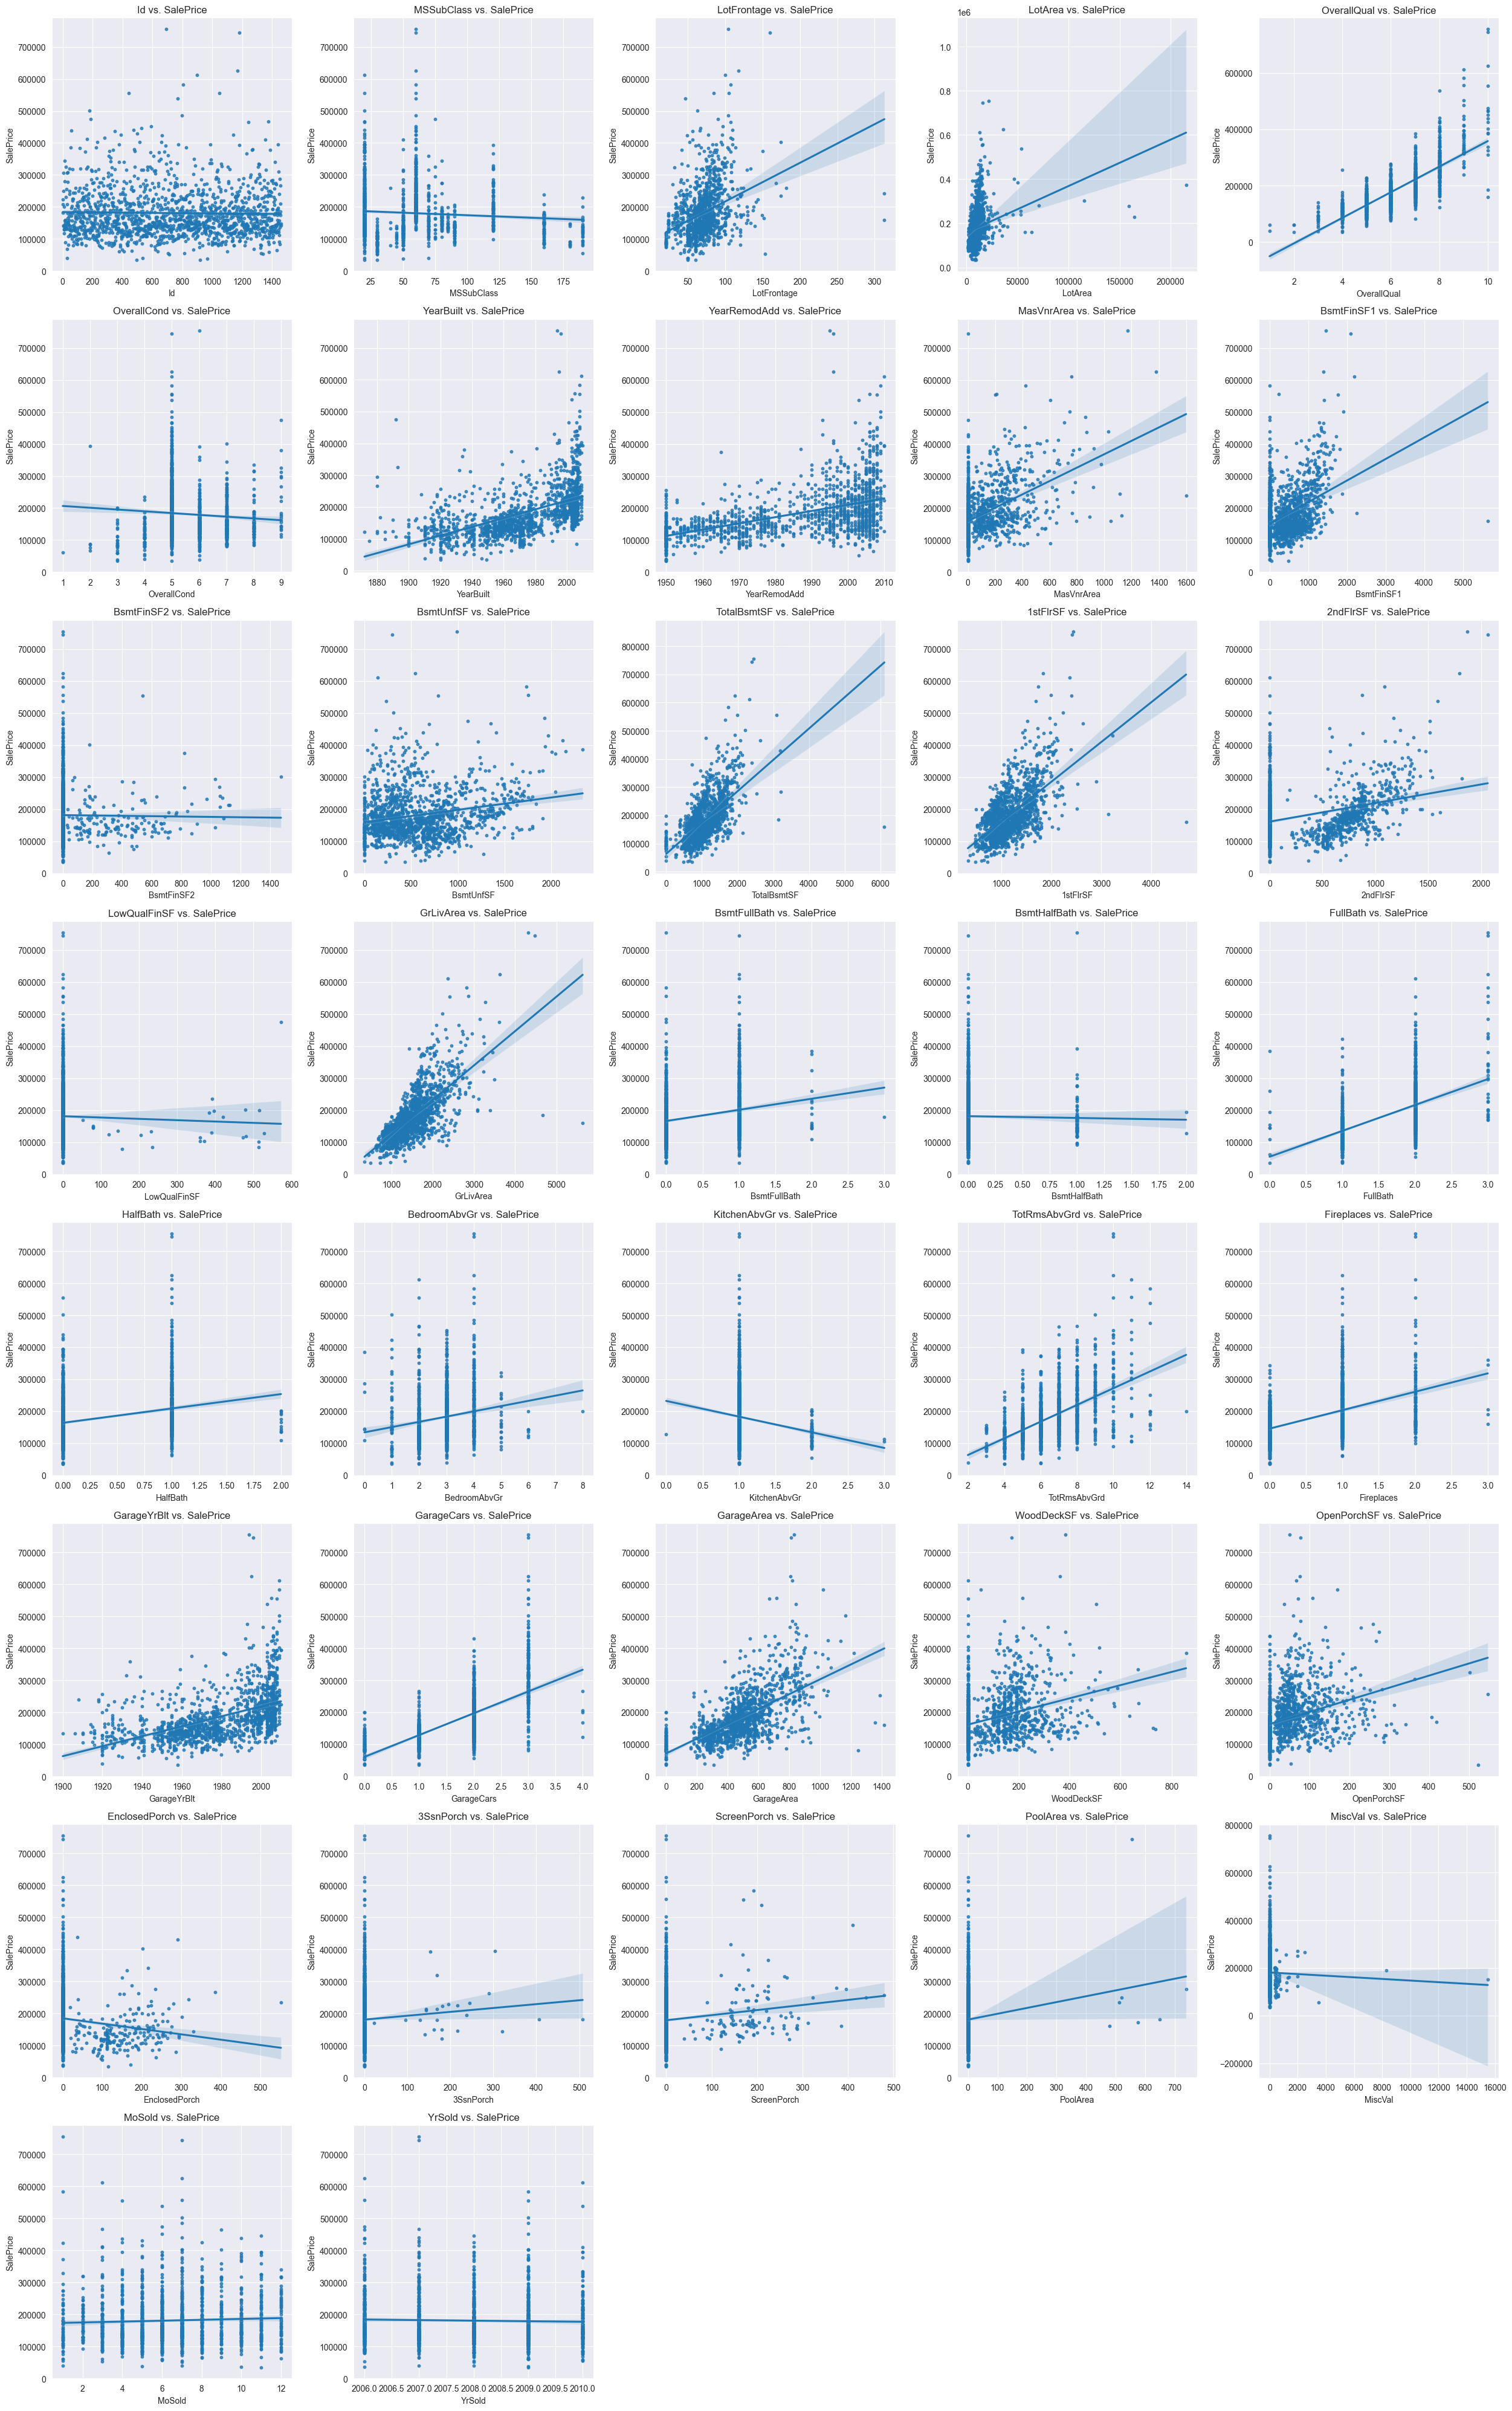

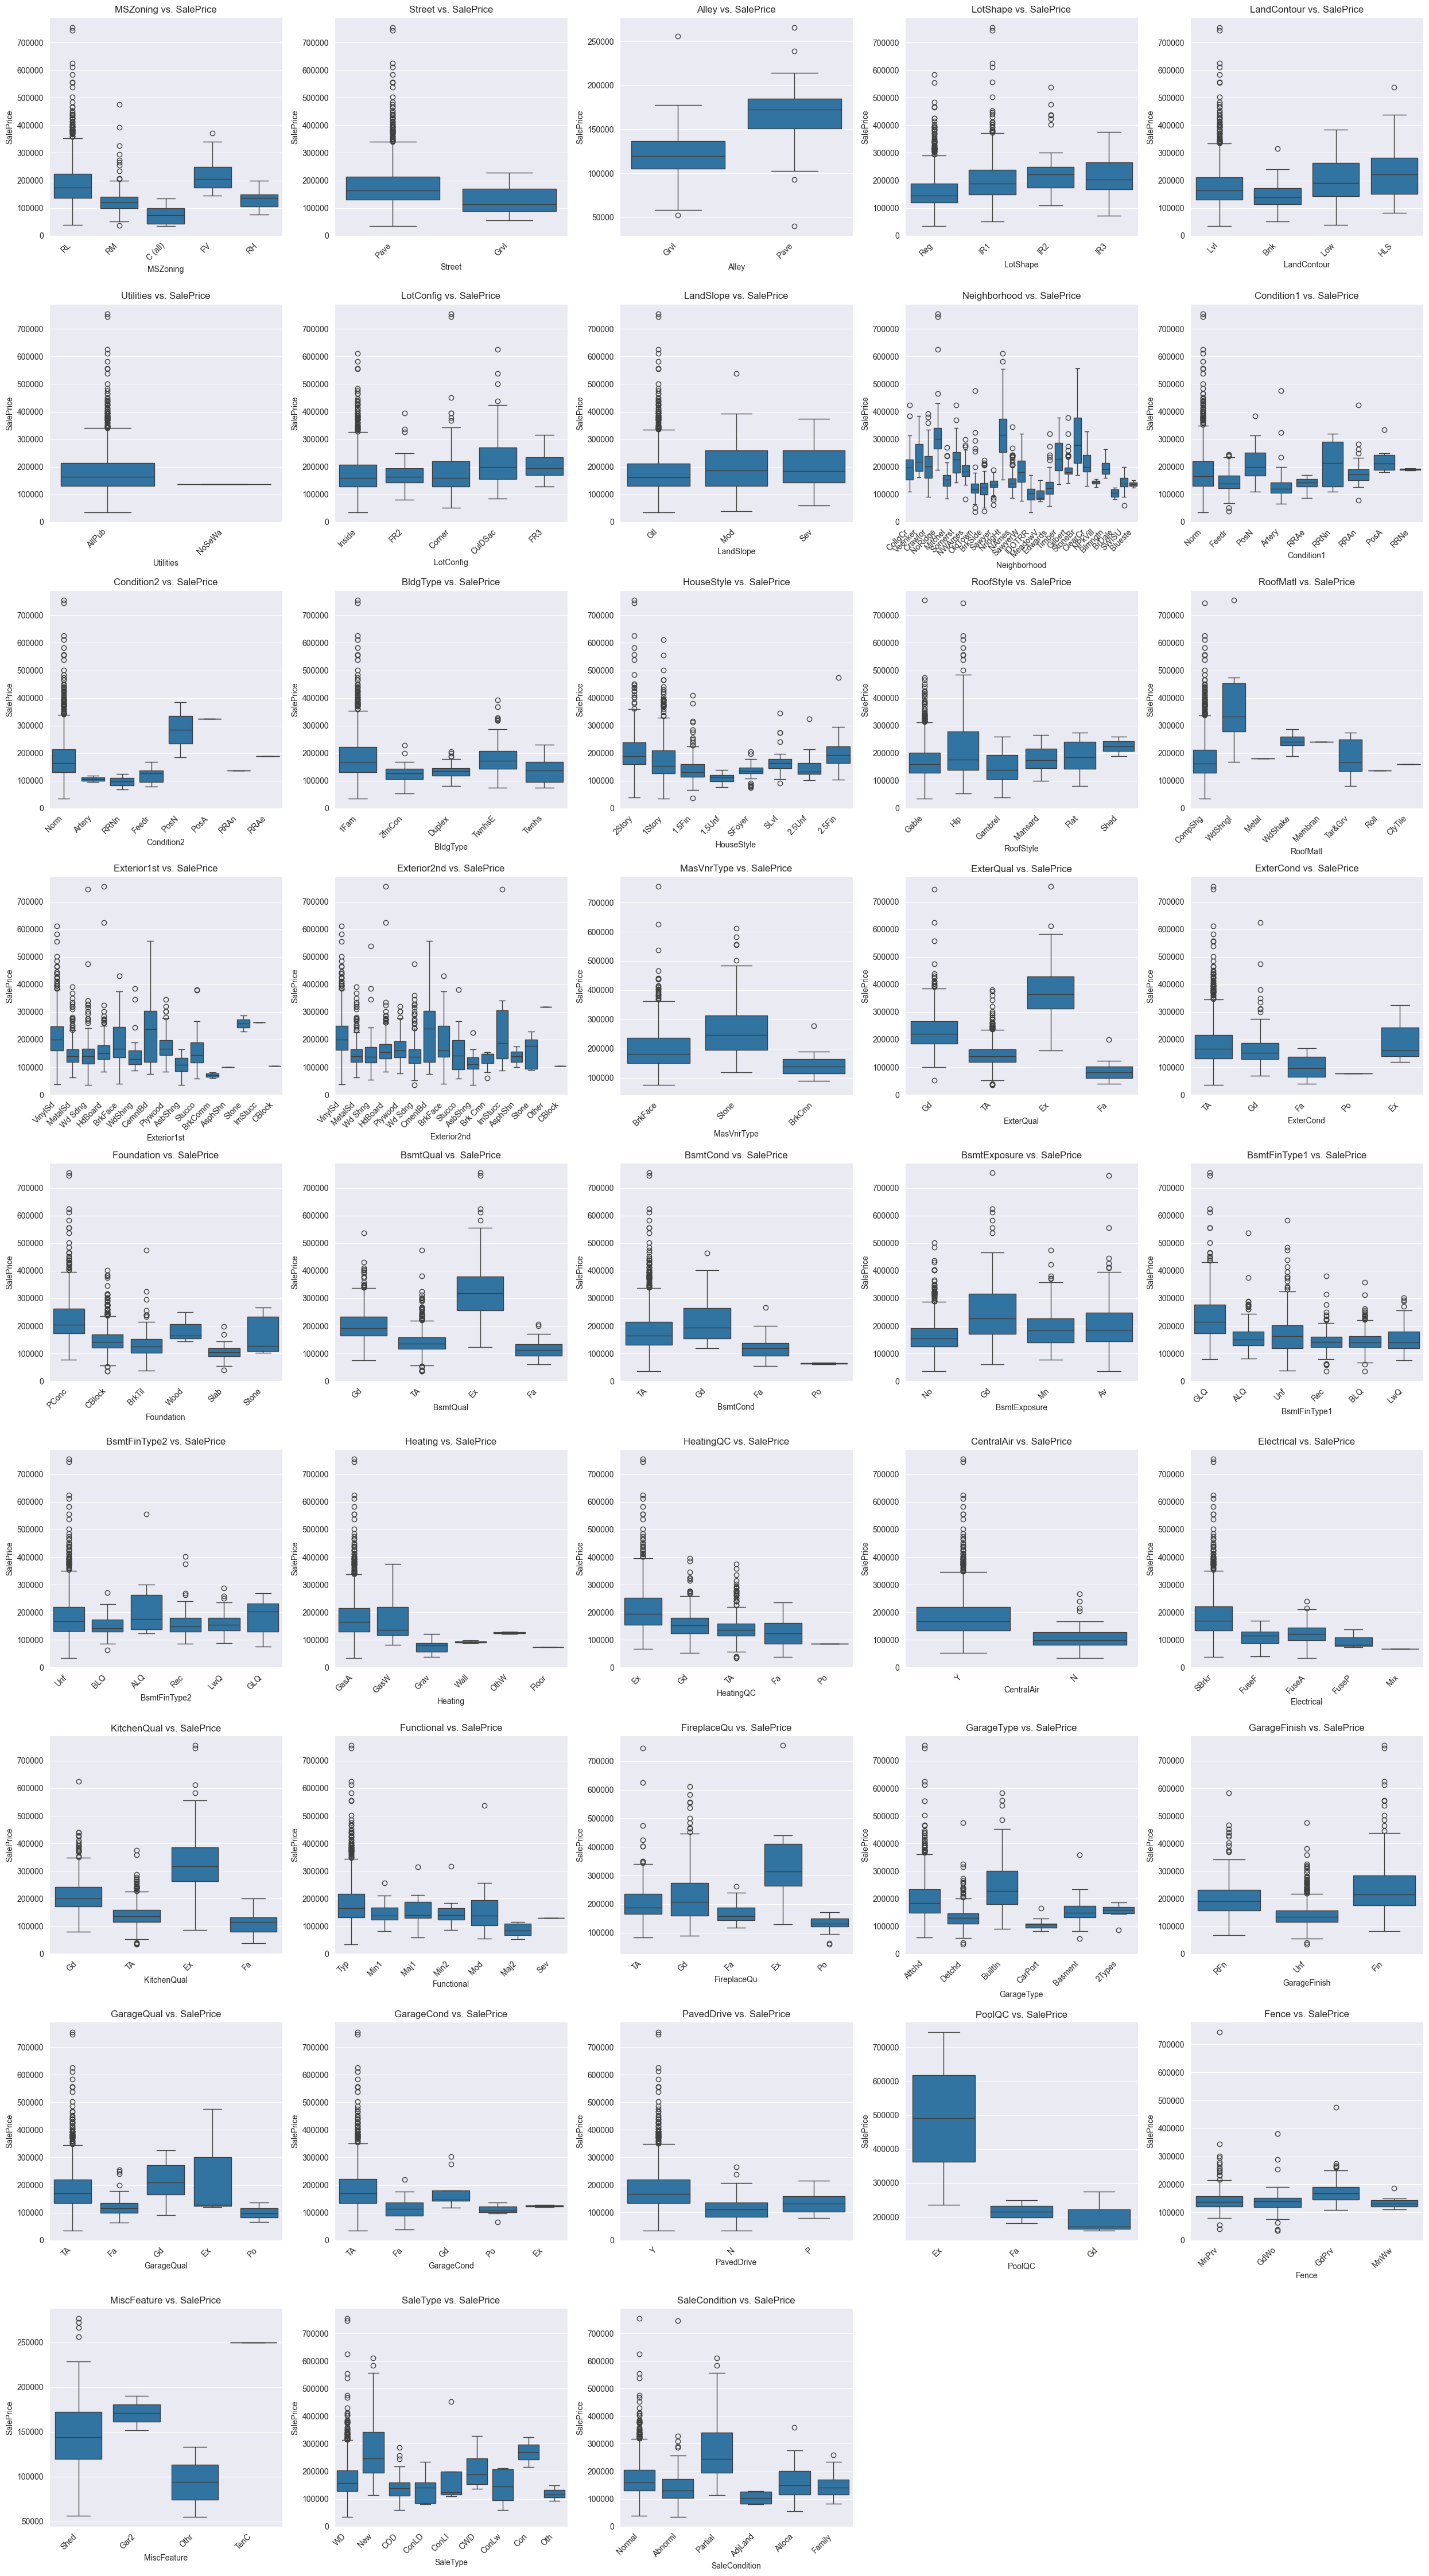

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_target_correlation(df, target_col):
    """
    Plots the correlation between each feature in a DataFrame and a target column.

    For numerical features, it uses scatter plots.
    For categorical features, it uses box plots.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
        target_col (str): The name of the target column.
    """

    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cols_per_row = 5
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' not found in DataFrame.")
        return

    # Remove the target column from feature lists
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    # Plot numerical feature vs. target
    if len(numerical_cols) > 0:
        num_plots = len(numerical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(numerical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.regplot(x=df[col], y=df[target_col], scatter_kws={'s':10}) #added regplot
            plt.title(f'{col} vs. {target_col}')
        plt.tight_layout()
        plt.show()

    # Plot categorical feature vs. target
    if len(categorical_cols) > 0:
        num_plots = len(categorical_cols)
        rows = (num_plots + cols_per_row - 1) // cols_per_row

        plt.figure(figsize=(25, 5 * rows))
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(rows, cols_per_row, i)
            sns.boxplot(x=df[col], y=df[target_col])
            plt.title(f'{col} vs. {target_col}')
            plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot feature-target correlations
plot_feature_target_correlation(df, 'SalePrice')